In [10]:
#1.Logistic regression For Gender Voice Dataset

In [11]:
import pandas as p
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

d=p.read_csv('gender_voice_dataset.csv')
#d.fillna(d['median'].mean(),inplace=True)
d.dropna(inplace=True)
d['label']=d['label'].map({'female':0,'male':1})


x=d[['meanfreq','sd','median','Q25','Q75','IQR','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']]

y=d[['label']]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
c=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')

c.fit(x_train,y_train)
prediction=c.predict(x_test)
accuracy=accuracy_score(y_test,prediction)

print("confusion matrix:",confusion_matrix(y_test,prediction))
print("accuracy :" ,accuracy)
print("classification report: ",classification_report(y_test,prediction))


confusion matrix: [[289  34]
 [  8 300]]
accuracy : 0.9334389857369255
classification report:                precision    recall  f1-score   support

           0       0.97      0.89      0.93       323
           1       0.90      0.97      0.93       308

    accuracy                           0.93       631
   macro avg       0.94      0.93      0.93       631
weighted avg       0.94      0.93      0.93       631



In [12]:
#2 Naïve bayes 

confusion matrix: [[265  39]
 [ 25 302]]
accuracy : 0.8985736925515055
classification report:                precision    recall  f1-score   support

           0       0.91      0.87      0.89       304
           1       0.89      0.92      0.90       327

    accuracy                           0.90       631
   macro avg       0.90      0.90      0.90       631
weighted avg       0.90      0.90      0.90       631



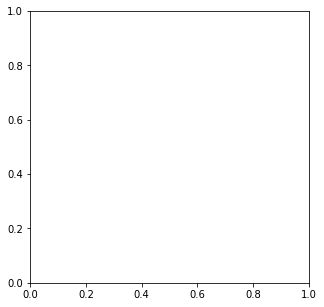

In [14]:
import pandas as p
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

d=p.read_csv('gender_voice_dataset.csv')
d.dropna(inplace=True)
d['label']=d['label'].map({'female':0,'male':1})
x=d[['meanfreq','sd','median','Q25','Q75','IQR','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']]
y=d[['label']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

g=GaussianNB()
g.fit(x_train,y_train)
prediction=g.predict(x_test)
accuracy=accuracy_score(y_test,prediction)

print("confusion matrix:",confusion_matrix(y_test,prediction))
print("accuracy :" ,accuracy)
print("classification report: ",classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
tn=cm[0][0]
fn=cm[1][0]
tp=cm[1][1]
fp=cm[0][1]

fpr=fp/(fp+tn)
tpr=tp/(tp+fn)

fig,ax=plt.subplots(figsize=(5,5))
fpr, tpr, _ = metrics.roc_curve(y_test,prediction)
auc = metrics.roc_auc_score(y_test,prediction)



In [15]:
# Linear Regression 

In [16]:

import pandas as p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.ensemble import *

data=p.read_csv('insurance.csv')
data.dropna(inplace=True)
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'northeast':0,'northwest':1,'southeast':2,'southwest':3})

x=data[['age','sex','bmi','children','smoker','region']]
y=data[['charges']]

lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
lr.fit(x_train,y_train)

prediction=lr.predict([[19,0,27.9,0,1,3]])
print("charges :",prediction)
print("mean square error",mean_squared_error(y_test,lr.predict(x_test)))

elastic=ElasticNet(alpha=0.00001)
elastic.fit(x_train,y_train)
print(mean_squared_error(y_test,elastic.predict(x_test)))
print(mean_absolute_error(y_test,elastic.predict(x_test)))
print(median_absolute_error(y_test,elastic.predict(x_test)))


lasso=Lasso(alpha=0.00001,normalize=True)
lasso.fit(x_train,y_train)
lasso.predict(x_test)


grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
grad.predict(x_test)

charges : [[24949.27193451]]
mean square error 38262818.002736315
38262944.57774873
4073.0016657325764
2265.478118767092


array([ 4314.71858825, 10397.61004224,  7850.73876654,  5960.09161705,
       39642.33989047,  3785.68821841, 47152.22417739, 12243.3926816 ,
        8208.43600745, 42665.38532924,  8255.64854814, 22652.27396947,
        7034.56877817, 10766.13498623,  4791.02260433,  6667.52130736,
        9450.50561978, 12890.19451164, 11812.62116537,  4673.82039438,
       12402.68597463, 38081.8147105 ,  2784.14644887,  2636.02931567,
       41085.03788402, 13153.47659776, 22226.36660564,  6970.24094125,
       39366.78754499,  9642.44320759,  7656.9195605 , 13016.17992762,
       35452.44177471,  9771.75303521,  5901.1958647 , 42003.82042154,
       35497.59658007,  8884.84520716, 10136.24550896,  4321.48853421,
       14067.42702416, 14416.83974659, 14877.56616783, 11918.81246747,
       11748.36413329,  8064.26578135,  2166.26692362,  7676.08015387,
        2591.05840358,  1414.99401726, 29303.01452862, 39079.64446286,
       42064.42625221, 22585.75115639, 45731.33846927,  2543.25754933,
      